In [1]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [2]:
fontP = font_manager.FontProperties()
fontP.set_family('Heiti TC')
fontP.set_size(14)
with open('housing.json') as f:
    dict = json.loads(f.read()) 

In [3]:
def option_list1():

    datacode_list = list(dict['data'].keys())
    dataname_list = []
    for datacode in datacode_list:  
        dataname_list.append(dict['data'][datacode]['name'])
    option = pd.DataFrame(list(zip(datacode_list,dataname_list)),columns=['資料代碼','資料名稱'])
    print(option['資料名稱'])
    return option

def option_list2(data_code):

    datacolumn_list = []
    for i in range(len(dict['data'][data_code]['c'])):
        column = dict['data'][data_code]['c'][i]['name']
        datacolumn_list.append(column)
    option = pd.DataFrame(datacolumn_list,columns=['序列名稱'])  
    print(option)
    return datacolumn_list

def dataparser(datacode,target):
    '''Decompose the time series dataframe given datacode'''
    df = pd.json_normalize(dict['data'][datacode],record_path='s')
    df = df.transpose()
    df = df[target]
    '''Split the list into Date and Index'''
    df = pd.DataFrame(df.dropna().to_list(),columns=['Date','Index'])
    df['Date'] = pd.to_datetime(df['Date'])
    df['Index'] = pd.to_numeric(df['Index'])
    return df

class Price:
    def __init__(self,datacode,target,datacolumn_list):
        self.df = dataparser(datacode,target)
        self.name = dict['data'][datacode]['name']
        self.title = datacolumn_list[target]

0                台灣-信義房價指數-各地區
1               台灣-信義房價指數-台北地區
2                台灣-國泰房價指數-各地區
3               台灣-國泰房價指數(年增率)
4               台灣-信義房價指數(年增率)
5               台灣-五大行庫新承作房貸金額
6                    台灣-住宅貸款餘額
7                    台灣-房屋移轉登記
8                 台灣-房屋移轉登記-交易
9                 台灣-房屋移轉登記-拍賣
10              台灣-五大行庫新承作房貸利率
11        台灣-貸款負擔率vs.購置住宅貸款違約率
12                   台灣-房市循環指標
13    台灣-消費者購置住宅貸款vs.建商貸款(年增率)
14             台灣-新建餘屋數vs.房價指數
15              台灣-清華安富房價指數-全國
16             台灣-清華安富房價指數-各地區
17           台灣-信義房價指數vs.名目GDP
18                  台灣-二手屋待售存量
19             台灣-百大社區成交變化-台北市
20                台灣-預售屋市場-台北市
21                台灣-預售屋市場-新北市
22                 台灣-預售屋市場-新竹
23                台灣-預售屋市場-台中市
24                台灣-預售屋市場-桃園市
25                台灣-預售屋市場-台南市
26                台灣-預售屋市場-高雄市
27                 台灣-成屋市場-台北市
28                 台灣-成屋市場-新北市
29                  台灣-成屋市場-新竹
30                 台灣-成屋市場-台中市
31                 台灣-成屋市場-桃園市
32      

Text(0.5, 1.0, '台灣-信義房價指數(年增率)/台北市')

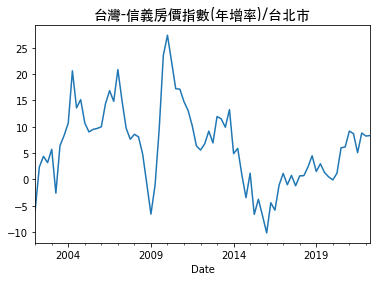

In [4]:
datacode = option_list1().iloc[int(input('請輸入資料代碼')),0]
datacolumn_list = option_list2(datacode)
target = int(input('請輸入代號'))

price1 = Price(datacode,target,datacolumn_list)
price1.df.plot('Date','Index',legend=False)
plt.title(f"{price1.name}/{price1.title}",fontproperties=fontP)
